# Comcast Telecom Consumer Complaints Analysis 

**Problem Statement : -**

Comcast is an American global telecommunication company. The firm has been providing terrible customer service. They continue to fall short despite repeated promises to improve. Only last month (October 2016) the authority fined them a $2.3 million, after receiving over 1000 consumer complaints.
The existing database will serve as a repository of public customer complaints filed against Comcast.It will help to pin down what is wrong with Comcast's customer service.

** Analysis to be done on: - **
1. Import data into Python environment.

2. Provide the trend chart for the number of complaints at monthly and daily granularity levels.

3. Provide a table with the frequency of complaint types.
    --Which complaint types are maximum i.e., around internet, network issues, or across any other domains.
    
4. Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

5. Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:
    - Which state has the maximum complaints
    - Which state has the highest percentage of unresolved complaints
    - Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

### 1. Import data into Python environment:

In [1]:
#import essential libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime

In [2]:
#load dataset

df = pd.read_csv('Comcast_telecom_complaints_data.csv',date_parser = ['Date_month_year'])

In [3]:
# check basic information about data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
Ticket #                       2224 non-null object
Customer Complaint             2224 non-null object
Date                           2224 non-null object
Date_month_year                2224 non-null object
Time                           2224 non-null object
Received Via                   2224 non-null object
City                           2224 non-null object
State                          2224 non-null object
Zip code                       2224 non-null int64
Status                         2224 non-null object
Filing on Behalf of Someone    2224 non-null object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [4]:
# check first 5 observation of the dataset

df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [5]:
# check statistics of dataset

df.describe()

,Zip code
count,2224.000000
mean,47994.393435
std,28885.279427
min,1075.000000
25%,30056.500000
50%,37211.000000
75%,77058.750000
max,99223.000000


### 2. Trend chart of customer complaints

In [6]:
# change column type to datetime format

df['Date_month_year']= pd.to_datetime(df['Date_month_year'],infer_datetime_format=True)

In [7]:
# create a new column of month

#df['Month'] = df['Date_month_year'].apply(lambda x: x.strftime('%B-%Y')) 
df['Month'] = df['Date_month_year'].dt.month

In [8]:
# create a dataframe - monthwise complaints

df1=df.groupby('Month').count()['Customer Complaint'].to_frame()
df1.transpose()

Month,1,2,3,4,5,6,7,8,9,10,11,12
Customer Complaint,55,59,45,375,317,1046,49,67,55,53,38,65


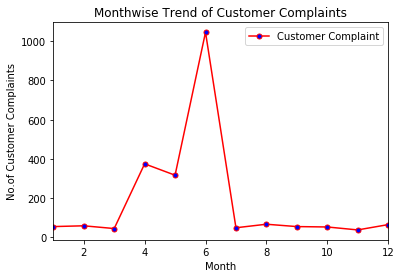

In [9]:
# plot Month wise trend chart

df1.plot(marker='o', markerfacecolor='blue', markersize=5,color= 'red')
plt.title('Monthwise Trend of Customer Complaints',fontsize =12)
plt.xlabel('Month')
plt.ylabel('No.of Customer Complaints')
plt.show()

In [10]:
# create a new column of day

df['day']= df['Date_month_year'].dt.day

In [11]:
# create a dataframe - daywise complaints

df2 = df.groupby('day').count()['Customer Complaint'].to_frame()
df2.transpose()

day,4,5,6,13,14,15,16,17,18,19,...,22,23,24,25,26,27,28,29,30,31
Customer Complaint,206,131,272,68,54,58,65,60,69,50,...,66,225,249,126,90,81,79,87,86,10


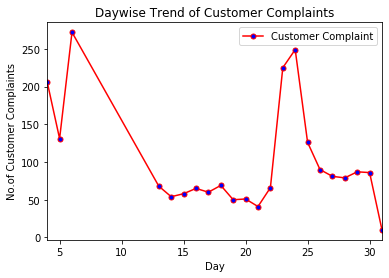

In [12]:
# plot Day wise trend chart

df2.plot(marker='o', markerfacecolor='blue', markersize=5,color= 'red')
plt.title('Daywise Trend of Customer Complaints',fontsize =12)
plt.xlabel('Day')
plt.ylabel('No.of Customer Complaints')
plt.show()

### 3. Type of Complaints

In [13]:
#create a frequency table of type of Customer complaint

df3 = df['Customer Complaint'].value_counts()
df3 = pd.DataFrame({'Customer Complaint Type': df3.index, 'Freq':df3.values})
df3[:11]

,Customer Complaint Type,Freq
0,Comcast,83
1,Comcast Internet,18
2,Comcast Data Cap,17
3,comcast,13
4,Data Caps,11
5,Comcast Data Caps,11
6,Comcast Billing,11
7,Unfair Billing Practices,9
8,Data Cap,8
9,Comcast data caps,8


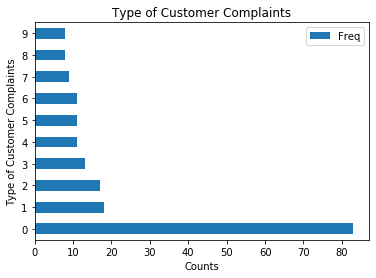

In [14]:
#graphical representation - type of Customer complaint

df3[:10].plot(kind = 'barh')
plt.title('Type of Customer Complaints',fontsize =12)
plt.xlabel('Counts')
plt.ylabel('Type of Customer Complaints')
plt.show()

### 4. Map compaint status into two category open and closed

In [15]:
#check unique compaint status

df['Status'].unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [16]:
# staus wise counts

df['Status'].value_counts()

Solved     973
Closed     734
Open       363
Pending    154
Name: Status, dtype: int64

In [17]:
#define function to map status categories

def status(x):
  if (x =='Closed')or(x =='Solved'):
    return 'Closed'
  else:
    return 'Open'

In [18]:
# apply function to column

df['Status']= df['Status'].apply(status)

In [19]:
# recheck staus wise counts post mapping

df['Status'].value_counts()

Closed    1707
Open       517
Name: Status, dtype: int64

### 5. create stack bar chart of complaint status

In [20]:
#State wise complaint status

df4 =df.groupby(['State','Status']).count()['Customer Complaint'].unstack().fillna(0)
df4.head(10)

Status,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,0.0


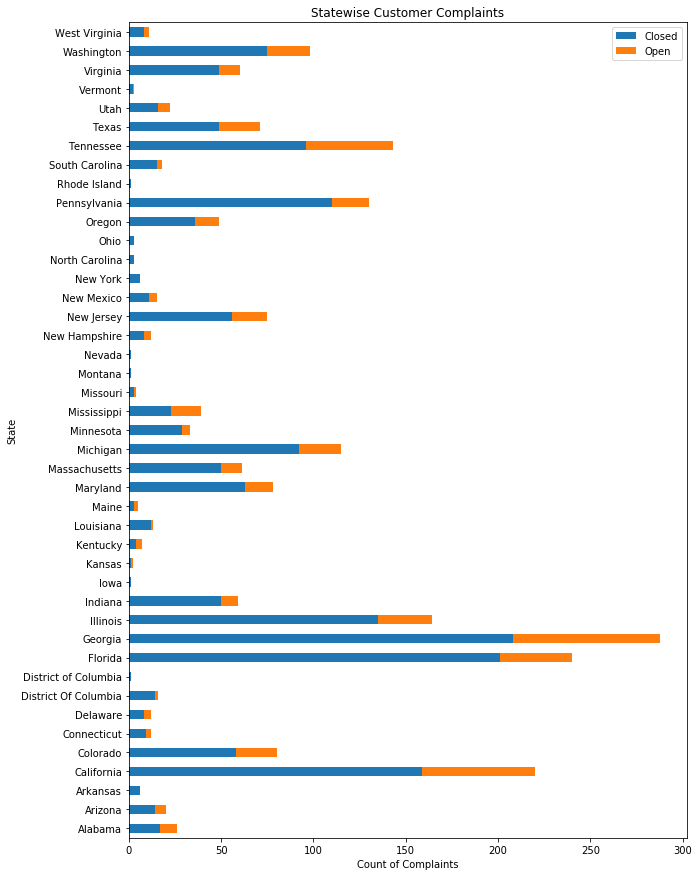

In [21]:
# plot state wise complaint status - stacked bar chart

df4.plot(kind="barh",figsize=(10,15),stacked =True);
plt.title('Statewise Customer Complaints',fontsize =12);
plt.xlabel('Count of Complaints')
plt.legend()
plt.show()

#### 5.1 State having maximum customer complaints 

In [22]:
#State wise complaints

df5 = df.groupby('State').count()['Customer Complaint'].to_frame()
df5 = df5.sort_values('Customer Complaint',ascending = False)
df5 = pd.DataFrame(data = df5, columns = ['Customer Complaint'])
df5[:10]

,Customer Complaint
State,
Georgia,288
Florida,240
California,220
Illinois,164
Tennessee,143
Pennsylvania,130
Michigan,115
Washington,98
Colorado,80


In [23]:
# find state of maximum customer complaints 

highest_complaint_state = df5.idxmax()
print('highest state of',highest_complaint_state )

highest state of Customer Complaint    Georgia
dtype: object


#### 5.2 State having highest % of unresolved customer complaints

In [24]:
#create a total complaint column in dataframe

df4['Total'] = df4['Open']+df4['Closed']
df6 = df4
df6.head()

Status,Closed,Open,Total
State,,,
Alabama,17.0,9.0,26.0
Arizona,14.0,6.0,20.0
Arkansas,6.0,0.0,6.0
California,159.0,61.0,220.0
Colorado,58.0,22.0,80.0


In [25]:
#calculate % of unresolved complaint
df6['%unresolved']= df6['Open']/df6['Total']
df7=df6.sort_values('%unresolved',ascending = False)


In [26]:
#state having highest unresolved complaints is Kansas

highest_unresolved_complaint_state = df7['%unresolved'].idxmax()
print('Highest unresolved complaint state is :', highest_unresolved_complaint_state)

Highest unresolved complaint state is : Kansas


#### 5.3  Internet and customer care calls - compalint resolved%

In [27]:
#check count of complaints received via

df.groupby('Received Via').count()['Status']

Received Via
Customer Care Call    1119
Internet              1105
Name: Status, dtype: int64

In [28]:
# compare two columns

df8 = pd.crosstab(df['Received Via'],df['Status'])
df8

Status,Closed,Open
Received Via,,
Customer Care Call,864,255
Internet,843,262


In [29]:
# create % resolved column 

df8['%resolved']= (df8['Closed']/(df8['Closed']+df8['Open']))*100

In [30]:
# check desired result

df8

Status,Closed,Open,%resolved
Received Via,,,
Customer Care Call,864,255,77.211796
Internet,843,262,76.289593
